In [1]:
def retrive_id(ele_list):
    model_id = '{}_dm{}_el{}_sl{}_pl{}_co{}_bs{}_bfs{}_lr{}_st{}'.format(
    ele_list[0],
    ele_list[1],
    ele_list[2],
    ele_list[3],
    ele_list[4],
    ele_list[5],
    ele_list[6],
    ele_list[7],
    ele_list[8],
    ele_list[9],
)
    return model_id

In [31]:
import pandas as pd
import re

pd.set_option('display.max_colwidth', None)
# 从文本文件读取内容
with open('result_rbf.txt', 'r') as file:
    lines = file.readlines()

data = []
data1 = []
data2 = []
# flag是为了选择相邻的下一行
flag1 = False
flag2 = False

# 正则表达式模式
pattern1 = r'(\w+)_dm(\d+)_el(\d+)_sl(\d+)_pl(\d+)_co(\d+)_bs(\d+)_bfs(\d+)_lr(-?\d+(?:\.\d+)?(?:e[-+]?\d+)?)_st(\w+)'
# 这个正则表达式同时支持负数和e的存在
pattern2 = r'eq(-?\d+(?:\.\d+)?(?:e[-+]?\d+)?)_edq(-?\d+(?:\.\d+)?(?:e[-+]?\d+)?)_ep(-?\d+(?:\.\d+)?(?:e[-+]?\d+)?)_'
# 逐行解析内容
for line in lines:
    #print(line)
    matches = re.match(pattern1, line)
    if matches:
        elements = matches.groups()
        result = {
            'model_id':retrive_id(elements), #'_'.join(str(item) for item in elements)
            'model': elements[0],
            'd_model': int(elements[1]),
            'e_layers': int(elements[2]),
            'seq_len': int(elements[3]),
            'pred_len': int(elements[4]),
            'c_out': int(elements[5]),
            'batch_size': int(elements[6]),
            'buffer_size': int(elements[7]),
            'lr': float(elements[8]),
            'sample_type': elements[9]
        }
        #data1.append(result)
        flag1 = True
        flag2 = False
    matches2 = re.match(pattern2, line)
    if matches2:
        elements = matches2.groups()
        result2 = {
            'eq': float(elements[0]),
            'edq': float(elements[1]),
            'ep': float(elements[2]),
        }
        #data2.append(result2)
        flag2 = True
    if flag1 and flag2:
        flag1 = False
        flag2 = False
        #print(result,result2)
        result_f = {}
        result_f.update(result)
        result_f.update(result2)
        data.append(result_f)
print(len(data))
df = pd.DataFrame(data)
df['eq']=df['eq']*10
df = df.sort_values(by='ep')
df.head(50)


43


,model_id,model,d_model,e_layers,seq_len,pred_len,c_out,batch_size,buffer_size,lr,sample_type,eq,edq,ep
39,itf_dm32_el1_sl5_pl1_co2_bs64_bfs64_lr0.0001_stlog,itf,32,1,5,1,2,64,64,0.00010,log,0.000151,-3.073544e-06,0.000057
40,itf_dm32_el1_sl5_pl1_co2_bs64_bfs64_lr5e-05_stlog,itf,32,1,5,1,2,64,64,0.00005,log,0.000149,-3.208286e-06,0.000062
32,itf_dm16_el2_sl5_pl1_co2_bs64_bfs64_lr5e-05_stlog,itf,16,2,5,1,2,64,64,0.00005,log,0.000144,3.683422e-07,0.000064
24,itf_dm16_el1_sl5_pl1_co2_bs64_bfs64_lr0.0001_stlog,itf,16,1,5,1,2,64,64,0.00010,log,0.000146,-8.260522e-07,0.000064
25,itf_dm16_el1_sl5_pl1_co2_bs64_bfs64_lr5e-05_stlog,itf,16,1,5,1,2,64,64,0.00005,log,0.000142,-6.382340e-07,0.000069
8,itf_dm8_el1_sl5_pl1_co2_bs64_bfs64_lr0.0001_stlog,itf,8,1,5,1,2,64,64,0.00010,log,0.000141,-1.973282e-08,0.000069
16,itf_dm8_el2_sl5_pl1_co2_bs64_bfs64_lr0.0001_stlog,itf,8,2,5,1,2,64,64,0.00010,log,0.000139,-1.047538e-06,0.000069
17,itf_dm8_el2_sl5_pl1_co2_bs64_bfs64_lr5e-05_stlog,itf,8,2,5,1,2,64,64,0.00005,log,0.000139,7.441155e-07,0.000071
9,itf_dm8_el1_sl5_pl1_co2_bs64_bfs64_lr5e-05_stlog,itf,8,1,5,1,2,64,64,0.00005,log,0.000139,9.331152e-07,0.000072
37,itf_dm32_el1_sl5_pl1_co2_bs32_bfs32_lr0.0001_stlog,itf,32,1,5,1,2,32,32,0.00010,log,0.000159,-2.755049e-06,0.000078


In [5]:
df_res = df.groupby('model_id').agg({
                               'eq':'mean',
                               'edq':'mean',
                               'ep': 'mean'}).reset_index()
df_res = df_res.sort_values(by='ep')
df_res

,model_id,eq,edq,ep
1,if_48_2_20_3_4_64_500_0.0001_log,-0.381093,-0.134072,0.018193
0,if_48_1_20_3_4_64_200_0.0001_log,-0.129846,-0.040014,0.033509
2,if_48_3_20_3_4_64_500_0.0001_log,-0.493973,-0.129646,0.060325
3,it_48_3_20_3_4_64_500_0.0001_log,-0.318697,-0.072880,0.060807


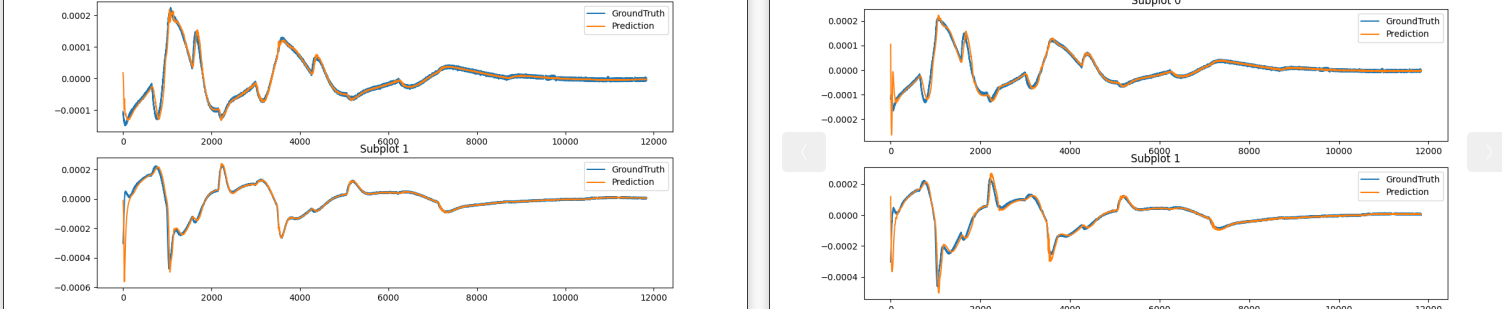

In [ ]:
# 按照这样去提问：er
# it_dm48_el3_sl20_pl3_co4_bs64_bfs500_lr0.0001_stlog  解析出这一行中的元素，按照格式{}_dm{}_el{}_sl{}_pl{}_co{}_bs{}_bfs{}_lr{}_st{}

In [5]:
import re

text = "it_dm48_el3_sl20_pl3_co4_bs64_bfs500_lr0.0001_stlog"

pattern = r'(\w+)_dm(\d+)_el(\d+)_sl(\d+)_pl(\d+)_co(\d+)_bs(\d+)_bfs(\d+)_lr([\d\.]+)_st(\w+)'

matches = re.match(pattern, text)

if matches:
    elements = matches.groups()
    result = {
        'model': elements[0],
        'd_model': int(elements[1]),
        'e_layers': int(elements[2]),
        'seq_len': int(elements[3]),
        'pred_len': int(elements[4]),
        'c_out': int(elements[5]),
        'batch_size': int(elements[6]),
        'buffer_size': int(elements[7]),
        'lr': float(elements[8]),
        'sample_type': elements[9]
    }

    print(result)
else:
    print("No match found.")


{'model': 'it', 'd_model': 48, 'e_layers': 3, 'seq_len': 20, 'pred_len': 3, 'c_out': 4, 'batch_size': 64, 'buffer_size': 500, 'lr': 0.0001, 'sample_type': 'log'}


In [9]:
import pandas as pd
import re

# 多行文本
texts = [
    "lstm_dm48_el3_sl20_co4_bs64_bfs500_lr0.0001_stlog eq-1.3638014120692416e-06_edq-0.0008137485656850782_ep0.0017716611097180804_",
    "it_dm48_el3_sl20_pl3_co4_bs64_bfs500_lr0.0001_stlog eq-3.9896299186206556e-05_edq-0.004002702143831932_ep0.004246625570525356_",
    "it_dm48_el3_sl20_pl3_co4_bs64_bfs500_lr0.0001_stlog eq-0.5289665494961574_edq-0.10656055706101562_ep0.10852484696141572_",
    "it_dm48_el3_sl20_pl3_co4_bs64_bfs500_lr0.0001_stlog eq-0.42708430274786946_edq-0.10807760894333868_ep0.06964832201365748_"
]

# 存储提取结果的列表
data = []

# 正则表达式模式
pattern = r'(\w+)_dm(\d+)_el(\d+)_sl(\d+)_pl(\d+)_co(\d+)_bs(\d+)_bfs(\d+)_lr([\d\.]+)_st(\w+)'

for text in texts:
    matches = re.match(pattern, text)
    if matches:
        elements = matches.groups()
        result = {
            'model': elements[0],
            'd_model': int(elements[1]),
            'e_layers': int(elements[2]),
            'seq_len': int(elements[3]),
            'pred_len': int(elements[4]),
            'c_out': int(elements[5]),
            'batch_size': int(elements[6]),
            'buffer_size': int(elements[7]),
            'lr': float(elements[8]),
            'sample_type': elements[9]
        }
        data.append(result)

# 创建 DataFrame
df = pd.DataFrame(data)
df


,model,d_model,e_layers,seq_len,pred_len,c_out,batch_size,buffer_size,lr,sample_type
0,it,48,3,20,3,4,64,500,0.0001,log
1,it,48,3,20,3,4,64,500,0.0001,log
2,it,48,3,20,3,4,64,500,0.0001,log
